In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from IPython.display import Image
from matplotlib import pyplot as plt
from urllib.request import urlretrieve
import os
import numpy as np
import seaborn as sb
import pandas as pd

%matplotlib inline

Using TensorFlow backend.


https://answear.com/1040840-mango-spodnica-cara.html
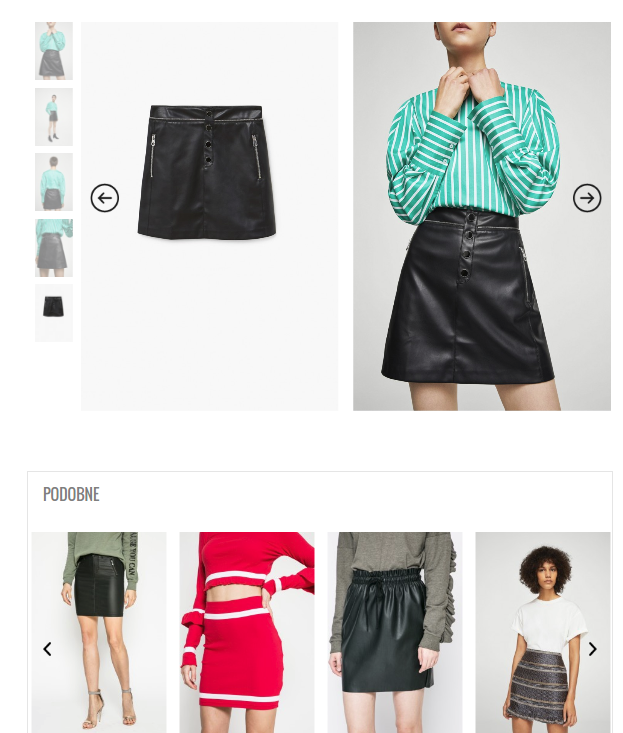

In [16]:
images=[
    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1152934.jpg",
    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1152936.jpg",
    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1152935.jpg",


    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1141458.jpg",
    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1141459.jpg",
    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1141460.jpg",
    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1141462.jpg",

    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1176686.jpg",
    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1176687.jpg",

    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1178245.jpg",
    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1178244.jpg",
    "https://img.ans-media.com/files/sc_staging_images/product/large_img_1178246.jpg",
    
    "https://ae01.alicdn.com/kf/HTB1DN1aLXXXXXaAXXXXq6xXFXXXT/Women-Nursing-Bra-Underwire-Push-Up-Transparent-Lace-Sexy-Bra-Women-s-Seamless-Super-Push-Up.jpg",
    "https://ae01.alicdn.com/kf/HTB1tvTcIVXXXXcUXFXXq6xXFXXXT/Summer-Sexy-Women-Brushed-Bra-Seamless-3-4-Cup-One-Piece-Bras-Massage-Bras-Underwear-No.jpg",
    "https://ae01.alicdn.com/wsphoto/v0/805946267/Side-gathering-breast-enlargement-sexy-lace-brief-collect-the-glossy-furu-adjustable-bra-Sweets.jpg",
    "http://52otss.com/wp-content/uploads/2015/10/sexy-bra-008-3.jpg",
    "https://ae01.alicdn.com/kf/HTB1lqQIIXXXXXa7aXXXq6xXFXXXI/Luxury-milk-sexy-bra-panties-gather-burst-on-the-palace-style-silk-like-fabric-underwear.jpg",
    "https://sc02.alicdn.com/kf/HTB1uD4hJXXXXXcZaXXXq6xXFXXXd/Latest-Fashion-Sexy-Bra-Sexy-Bra-And.jpg_350x350.jpg",
    "https://s-media-cache-ak0.pinimg.com/originals/66/7c/c8/667cc807505c8a9d08788e97a6691d20.jpg",
    
    "http://www.fancydressball.co.uk/big_images1/sequin-cop-hat-a1956.jpg",
#    "http://www.lalalingerie.com/images/accessorypopuptophat.jpg",
    "https://i.pinimg.com/736x/8d/93/e6/8d93e600c66dc6e593cdbbcf3e09ee0a--newsboy-cap-newsboy-hat-pattern.jpg",
#    "https://cdn.shopify.com/s/files/1/0914/1732/products/sexy-general-star-military-hat-halloween-accessory-3_large.jpeg?v=1504668288",
    "https://texaskitchen.files.wordpress.com/2012/06/1470.jpg",
    
    "https://i.pinimg.com/736x/65/2b/a1/652ba160c779b33896e837d87f9edf95--halloween-costumes-for-kids-boy-costumes.jpg",
    "http://assets.yandycdn.com/HiRez/RM_4496_CST2014.jpg",
    "https://sep.yimg.com/ay/abcunderwear/lumberjack-wood-pecker-funny-costume-6.jpg",
    
]


In [ ]:
for i in images:
    img_path = os.path.join("data",os.path.basename(i))
    if not os.path.exists(img_path):
        print("downloading {}".format(i))
        urlretrieve(i, img_path)
    #display(Image(filename=img_path, width=100, height=100))

In [ ]:
# load model
model = ResNet50(weights='imagenet', include_top=False, pooling="max")

In [ ]:
def recognize_images(image_paths, display_image_scaled=True, size=(224,224), model=model):
    X=[]
    for i in image_paths:
        img_path = os.path.join("data",os.path.basename(i))
        img = image.load_img(img_path, target_size=size)
        X.append(image.img_to_array(img))
    X = preprocess_input(np.array(X))
    preds = model.predict(X)
    return preds

preds=recognize_images(images)

In [ ]:
def get_cossim(matrix):
    # calculate cosine similarities
    distance = matrix.T @ matrix

    norm = (matrix * matrix).sum(0, keepdims=True) ** .5
    cossim = distance / norm / norm.T
    return cossim

cossim=get_cossim(preds.T)


In [ ]:
r=(len(images)+1)
df_cm = pd.DataFrame(cossim, range(1,r),
                  range(1,r))
plt.figure(figsize = (15,15))
sb.set(font_scale=1)#for label size
sb.heatmap(df_cm, annot=True,annot_kws={"size": 10})# font size


In [ ]:
def most_similar(idx, cossim=cossim):
    im_url=images[idx]
    img_path = os.path.join("data",os.path.basename(im_url))
    
    m=np.argsort(cossim[idx])
    return m
    
def display_image_by_idx(idx, width=100, height=100):
    im_url=images[idx]
    img_path = os.path.join("data",os.path.basename(im_url))
    display(Image(filename=img_path, width=width, height=height))
    
def display_simar(idx, top=3):
    sims=most_similar(idx)
    print ("Most similar images to: ")
    display_image_by_idx(idx, 150,150)
    print ("are following:")
    for i in reversed(sims[-top-1:-1]):
        display_image_by_idx(i, 80,80)
        print(cossim[idx,i])

In [ ]:
display_simar(1)

In [ ]:
display_simar(2)

In [ ]:
display_simar(7)

In [ ]:
display_simar(6)

In [ ]:
display_simar(9)

In [ ]:
import time
from IPython import display as d

for i in range(13, r-1):
    #d.clear_output(wait=True)
    print("\n\n\n")
    display_simar(i)
    time.sleep(3)